In [0]:
# Here we import everything we need for the project

%matplotlib inline
from google.colab import files
import os

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd

# Sklearn
from sklearn.model_selection import train_test_split # Helps with organizing data for training
from sklearn.metrics import confusion_matrix # Helps present results as a confusion-matrix

print(tf.__version__)

1.13.1


In [0]:
# Run this cell and select the kaggle.json file downloaded
# from the Kaggle account settings page.
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"prjnce0fpersja","key":"f2d794a5f7f3afd9a5b74d63b494bbf1"}'}

In [0]:
# Let's make sure the kaggle.json file is present.
!ls -lha kaggle.json

-rw-r--r-- 1 root root 70 May 31 03:39 kaggle.json


In [0]:
 #ext, install the Kaggle API client.
!pip install -q kaggle

In [0]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [0]:
# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
# List available datasets.
!kaggle datasets list

ref                                                          title                                                size  lastUpdated          downloadCount  
-----------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
vjchoudhary7/customer-segmentation-tutorial-in-python        Mall Customer Segmentation Data                       2KB  2018-08-11 07:23:02          13335  
fivethirtyeight/fivethirtyeight-comic-characters-dataset     FiveThirtyEight Comic Characters Dataset            577KB  2019-04-26 15:01:41           4193  
russellyates88/suicide-rates-overview-1985-to-2016           Suicide Rates Overview 1985 to 2016                 396KB  2018-12-01 19:18:25          38019  
karangadiya/fifa19                                           FIFA 19 complete player dataset                       2MB  2018-12-21 03:52:59          36438  
iarunava/cell-images-for-detecting-malaria                

In [0]:
# Copy the stackoverflow data set locally.
!kaggle datasets download -d gti-upm/leapgestrecog

 99% 1.05G/1.06G [00:18<00:00, 72.0MB/s]
100% 1.06G/1.06G [00:18<00:00, 60.3MB/s]


In [0]:
!unzip \*.zip

Archive:  leapgestrecog.zip
  inflating: leapGestRecog.rar       


In [0]:
get_ipython().system_raw("unrar x leapGestRecog.rar")

In [0]:
# We need to get all the paths for the images to later load them
imagepaths = []

# Go through all the files and subdirectories inside a folder and save path to images inside list
for root, dirs, files in os.walk(".", topdown=False): 
  for name in files:
    path = os.path.join(root, name)
    if path.endswith("png"): # We want only the images
      imagepaths.append(path)

print(len(imagepaths)) # If > 0, then a PNG image was loaded

20000


In [0]:

# This function is used more for debugging and showing results later. It plots the image into the notebook

def plot_image(path):
  img = cv2.imread(path) # Reads the image into a numpy.array
  img_cvt = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Converts into the corret colorspace (RGB)
  print(img_cvt.shape) # Prints the shape of the image just to check
  plt.grid(False) # Without grid so we can see better
  plt.imshow(img_cvt) # Shows the image
  plt.xlabel("Width")
  plt.ylabel("Height")
  plt.title("Image " + path)

(240, 640)


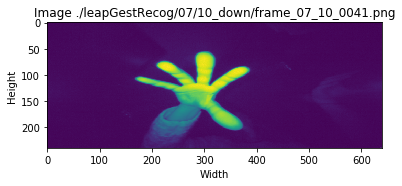

In [0]:
plot_image(imagepaths[0]) #We plot the first image from our imagepaths array

In [0]:
X = [] # Image data
y = [] # Labels

# Loops through imagepaths to load images and labels into arrays
for path in imagepaths:
  img = cv2.imread(path) # Reads image and returns np.array
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)# Converts into the corret colorspace (GRAY)
  img = cv2.resize(img, (320, 120)) # Reduce image size so training can be faster
  X.append(img)
  
  # Processing label in image path
  category = path.split("/")[3]
  label = int(category.split("_")[0][1]) # We need to convert 10_down to 00_down, or else it crashes
  y.append(label)

# Turn X and y into np.array to speed up train_test_split
X = np.array(X, dtype="uint8")
X = X.reshape(len(imagepaths), 120, 320, 1) # Needed to reshape so CNN knows it's different images
y = np.array(y)

print("Images loaded: ", len(X))
print("Labels loaded: ", len(y))

print(y[0], imagepaths[0]) # Debugging

Images loaded:  20000
Labels loaded:  20000
0 ./leapGestRecog/07/10_down/frame_07_10_0041.png


In [0]:
ts = 0.3 # Percentage of images that we want to use for testing. The rest is used for training.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ts, random_state=42)

In [0]:
# Import of keras model and hidden layers for our convolutional network
import keras
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten

In [0]:
# Construction of model
model = Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(120, 320, 1))) 
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 116, 316, 32)      832       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 58, 158, 32)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 56, 156, 64)       18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 28, 78, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 26, 76, 64)        36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 38, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 31616)             0         
__________

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
opt = keras.optimizers.SGD(lr=0.1)
# Configures the model for training
model.compile(optimizer=opt, # Optimization routine, which tells the computer how to adjust the parameter values to minimize the loss function.
              loss='sparse_categorical_crossentropy', # Loss function, which tells us how bad our predictions are.
              metrics=['accuracy']) # List of metrics to be evaluated by the model during training and testing.

In [0]:
# Trains the model for a given number of epochs (iterations on a dataset) and validates it.
model.fit(X_train, y_train, epochs=5, batch_size=64, verbose=2, validation_data=(X_test, y_test))

Train on 14000 samples, validate on 6000 samples
Epoch 1/5
 - 17s - loss: 1.0024e-06 - acc: 1.0000 - val_loss: 0.0055 - val_acc: 0.9988
Epoch 2/5
 - 17s - loss: 1.0024e-06 - acc: 1.0000 - val_loss: 0.0055 - val_acc: 0.9988
Epoch 3/5
 - 17s - loss: 1.0024e-06 - acc: 1.0000 - val_loss: 0.0055 - val_acc: 0.9988
Epoch 4/5
 - 17s - loss: 1.0024e-06 - acc: 1.0000 - val_loss: 0.0055 - val_acc: 0.9988
Epoch 5/5
 - 17s - loss: 1.0024e-06 - acc: 1.0000 - val_loss: 0.0055 - val_acc: 0.9988


In [0]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print('Test accuracy: {:2.2f}%'.format(test_acc*100))

6000/6000 [==============================] - 3s 514us/step
Test accuracy: 99.88%


In [0]:
predictions = model.predict(X_test) # Make predictions towards the test set

In [0]:
print(np.argmax(predictions[100]), y_test[100]) # If same, got it right
print(predictions[100])
print(y_test[100])

6 6
[3.9844882e-21 9.3130961e-09 4.6101070e-16 1.0352445e-11 6.6723948e-13
 1.2746678e-18 1.0000000e+00 8.5617032e-18 3.4468396e-14 1.8737987e-15]
6


In [0]:
# Function to plot images and labels for validation purposes
def validate_9_images(predictions_array, true_label_array, img_array):
  # Array for pretty printing and then figure size
  class_names = ["down", "palm", "l", "fist", "fist_moved", "thumb", "index", "ok", "palm_moved", "c"] 
  plt.figure(figsize=(15,5))
  
  for i in range(1, 10):
    # Just assigning variables
    prediction = predictions_array[i]
    true_label = true_label_array[i]
    img = img_array[i]
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    
    # Plot in a good way
    plt.subplot(3,3,i)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(prediction) # Get index of the predicted label from prediction
    
    # Change color of title based on good prediction or not
    if predicted_label == true_label:
      color = 'blue'
    else:
      color = 'red'

    plt.xlabel("Predicted: {} {:2.0f}% (True: {})".format(class_names[predicted_label],
                                  100*np.max(prediction),
                                  class_names[true_label]),
                                  color=color)
  plt.show()

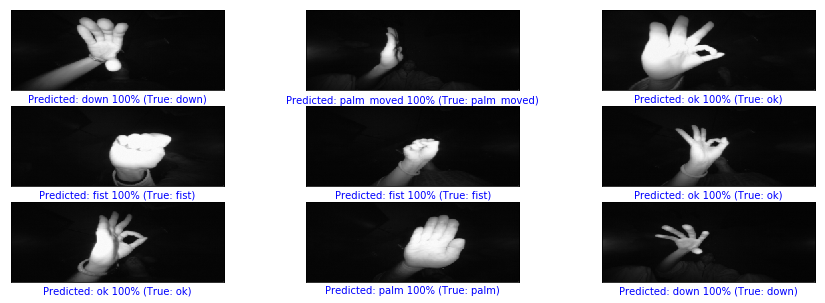

In [0]:
validate_9_images(predictions, y_test, X_test)

In [0]:
y_pred = np.argmax(predictions, axis=1) # Transform predictions into 1-D array with label number